# Reglas de asociación, Market Basket

In [ ]:
my_basket=[['bread','butter','wine','bananas','coffee','carrots'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['beer','chips','asparagus','salsa','milk','apples'],
           ['olive oil','bread','butter','tomatoes','steak','carrots'],
           ['tomatoes','onions','chips','wine','ketchup','orange juice'],
           ['bread','butter','beer','chips','milk'],
           ['butter','tomatoes','carrots','coffee','sugar'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['bread','butter','ketchup','coffee','chicken wings'],
           ['butter','beer','chips','asparagus','apples'],
           ['tomatoes','onion','beer','chips','milk','coffee']]


In [ ]:
def frecuencias(x, y): # X - antecedente, y - consecuente
  fx_ = sum([x in i for i in my_basket]) # Frecuencia del antecedente
  fy_ = sum([y in i for i in my_basket]) # frecuencia del consecuente

  fxy_ = sum( [ all( z in i for z in [x, y] ) for i in my_basket ] ) # Frecuencia de la unión

  support = fxy_ / len(my_basket)
  confidence = support/(fx_/len(my_basket))
  lift = confidence/(fy_/len(my_basket))

  print('Soporte = {}'.format(round(support, 2)))
  print('Confianza = {}'.format(round(confidence, 2)))
  print('Lift = {}'.format(round(lift, 2)))


In [ ]:
frecuencias('beer', 'chips')

Soporte = 0.36
Confianza = 1.0
Lift = 2.2


* En el 36% aparece cerveza y papas
* Siempre que aparece cerveza aparecen las papas
* Es muy probable que cuando aparece papas aparezca cerveza

In [ ]:
frecuencias('chips', 'beer')

Soporte = 0.36
Confianza = 0.8
Lift = 2.2


* En el 80% que aparece papas, aparece cerveza

In [ ]:
frecuencias('bread', 'butter')

Soporte = 0.36
Confianza = 1.0
Lift = 1.83


In [ ]:
frecuencias('onion', 'cheese')

Soporte = 0.0
Confianza = 0.0
Lift = 0.0


In [ ]:
frecuencias('onions', 'cheese')

Soporte = 0.18
Confianza = 0.67
Lift = 3.67


In [ ]:
frecuencias('cheese', 'onions')

Soporte = 0.18
Confianza = 1.0
Lift = 3.67


# Algoritmo Apriori

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
groceries = pd.read_csv("http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/groceries.csv", sep=";")
groceries

,ID,Transaction
0,0,"milk,bread,biscuit"
1,1,"bread,milk,biscuit,cereal"
2,2,"bread,tea"
3,3,"jam,bread,milk"
4,4,"tea,biscuit"
5,5,"bread,tea"
6,6,"tea,cereal"
7,7,"bread,tea,biscuit"
8,8,"jam,bread,tea"
9,9,"bread,milk"


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
transactions = list(groceries.Transaction.apply(lambda x: sorted(x.split(','))))
transactions

[['biscuit', 'bread', 'milk'],
 ['biscuit', 'bread', 'cereal', 'milk'],
 ['bread', 'tea'],
 ['bread', 'jam', 'milk'],
 ['biscuit', 'tea'],
 ['bread', 'tea'],
 ['cereal', 'tea'],
 ['biscuit', 'bread', 'tea'],
 ['bread', 'jam', 'tea'],
 ['bread', 'milk'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['coffee', 'sugar'],
 ['bread', 'coffee', 'orange'],
 ['biscuit', 'bread', 'sugar'],
 ['cereal', 'coffee', 'sugar'],
 ['biscuit', 'bread', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['cereal', 'coffee', 'milk', 'tea']]

In [ ]:
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot

array([[ True,  True, False, False, False,  True, False, False, False],
       [ True,  True,  True, False, False,  True, False, False, False],
       [False,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True,  True, False, False, False],
       [ True, False, False, False, False, False, False, False,  True],
       [False,  True, False, False, False, False, False, False,  True],
       [False, False,  True, False, False, False, False, False,  True],
       [ True,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False, False,  True],
       [False,  True, False, False, False,  True, False, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [False, False, False,  True, False, False, False,  True, False],
       [False,  True, False,  True, False, False,  True, False, 

In [ ]:
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 3, use_colnames = True)
frequent_itemsets.head(10)

,support,itemsets
0,0.40,(biscuit)
1,0.65,(bread)
2,0.30,(cereal)
3,0.40,(coffee)
4,0.10,(jam)
5,0.25,(milk)
6,0.15,(orange)
7,0.30,(sugar)
8,0.35,(tea)
9,0.25,"(bread, biscuit)"


In [ ]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,0.0300,1.200000
1,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,0.0300,1.120000
2,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,0.0000,1.000000
3,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,0.0000,1.000000
4,(orange),(biscuit),0.15,0.40,0.10,0.666667,1.666667,0.0400,1.800000
...,...,...,...,...,...,...,...,...,...
111,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf
112,"(coffee, milk)",(tea),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf
113,(tea),"(coffee, milk)",0.35,0.05,0.05,0.142857,2.857143,0.0325,1.108333
114,(milk),"(tea, coffee)",0.25,0.05,0.05,0.200000,4.000000,0.0375,1.187500


In [ ]:
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))
rules[rules['lhs items'] > 1].sort_values('lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
60,"(coffee, biscuit)",(orange),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf,2
54,"(cereal, biscuit)",(orange),0.15,0.15,0.10,0.666667,4.444444,0.0775,2.55,2
64,"(cereal, bread)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,2
111,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,2
88,"(coffee, milk)",(cereal),0.05,0.30,0.05,1.000000,3.333333,0.0350,inf,2


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items'] > 1].pivot(index = 'antecedents_',
                                            columns = 'consequents_',
                                            values = 'lift')
pivot

consequents_,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
antecedents_,,,,,,,,,
"bread,biscuit",NaN,NaN,NaN,NaN,NaN,1.600000,NaN,1.333333,NaN
"bread,milk",NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN
"cereal,biscuit",NaN,NaN,NaN,1.666667,NaN,1.333333,4.444444,NaN,NaN
"cereal,bread",2.500000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
"cereal,coffee",1.250000,NaN,NaN,NaN,NaN,1.000000,3.333333,NaN,NaN
"cereal,milk",1.250000,NaN,NaN,1.250000,NaN,NaN,NaN,NaN,1.428571
"coffee,biscuit",NaN,NaN,3.333333,NaN,NaN,NaN,6.666667,NaN,NaN
"coffee,bread",NaN,NaN,NaN,NaN,NaN,NaN,2.222222,2.222222,NaN
"coffee,milk",NaN,NaN,3.333333,NaN,NaN,NaN,NaN,NaN,2.857143


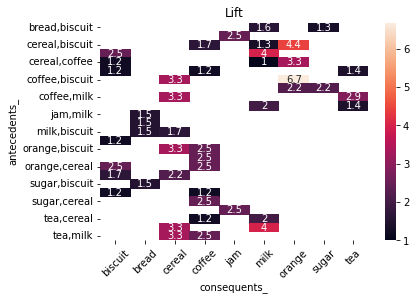

In [ ]:
sns.heatmap(pivot, annot = True)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.title('Lift')
plt.show()

# PCA

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_wine=pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    , header=None)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# En PCA siempre se estandariza
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals: ', eigen_vals)

Eigenvals:  [4.74376552 2.45913372 1.5276711  0.99327678 0.92313257 0.59663887
 0.46974164 0.09935613 0.17349645 0.34681782 0.23096439 0.25665489
 0.28504118]


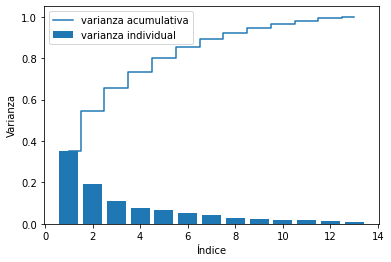

In [ ]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals)
var_exp = [ev / tot for ev in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, label = 'varianza individual', align = 'center')
plt.step(range(1, 14), cum_var_exp, where = 'mid', label = 'varianza acumulativa')
plt.xlabel('Índice')
plt.ylabel('Varianza')
plt.legend(loc = 'best')
plt.show()

Nos dice cuando aporta cada una de las componentes, estas no corresponden con las variables.

In [ ]:
# Lista de eigen-pares
eigen_par = [(np.abs(eigen_vals[i]), eigen_vecs[i])
              for i in range(len(eigen_vals))]

# Ordenados de mayor a menor
eigen_par.sort(key = lambda k: k[0], reverse = True)


In [ ]:
eigen_par[0]

(4.611183213378482,
 array([-0.09843843,  0.48675647,  0.21263166, -0.04771955,  0.33127699,
         0.16976249,  0.16797121, -0.44103376, -0.4829698 ,  0.17221439,
        -0.20413652,  0.18328897, -0.08009738]))

In [ ]:
w = np.hstack((eigen_par[0][1][:, np.newaxis],
               eigen_par[1][1][:, np.newaxis]))
print('Matriz W \n', w)

Matriz W 
 [[-0.09843843  0.25760131]
 [ 0.48675647  0.13422534]
 [ 0.21263166 -0.26832132]
 [-0.04771955  0.3596052 ]
 [ 0.33127699  0.24997914]
 [ 0.16976249  0.63634319]
 [ 0.16797121 -0.32885303]
 [-0.44103376  0.09393503]
 [-0.4829698  -0.06671678]
 [ 0.17221439 -0.04372196]
 [-0.20413652  0.17334304]
 [ 0.18328897 -0.29822355]
 [-0.08009738 -0.06763682]]


In [ ]:
print('Original : ', X_train_std[0])
print('Proyectada : ', X_train_std[0].dot(w))

Original :  [-1.72718287 -0.29604362 -0.26538608 -0.48683614 -0.10106739  1.23032632
  0.28664193 -1.59939014 -0.39584935 -0.74683204  0.96457859  0.52008268
 -1.23477905]
Proyectada :  [0.98152707 0.07930338]


In [ ]:
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

(124, 2)

# Scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_wine=pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    , header=None)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

¡¡¡ES RECOMENDABLE ESTANDARIZAR DESPUÉS DEL SPLITTING!!!

In [ ]:
# Ayuda con regresión logistica
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
lr = LogisticRegression(multi_class = 'auto', solver = 'liblinear')

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)


LogisticRegression(solver='liblinear')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


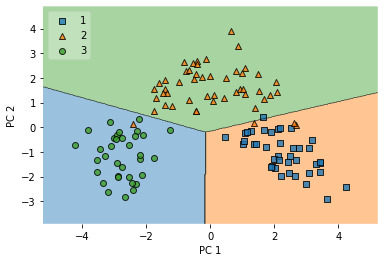

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca, np.array(y_train), clf = lr, legend = 2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


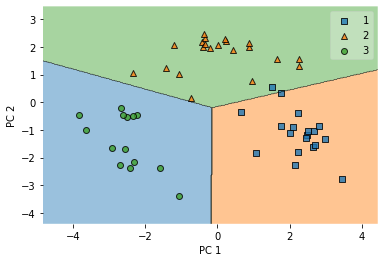

In [ ]:
plot_decision_regions(X_test_pca, np.array(y_test), clf = lr, legend = 1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# LDA con python

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


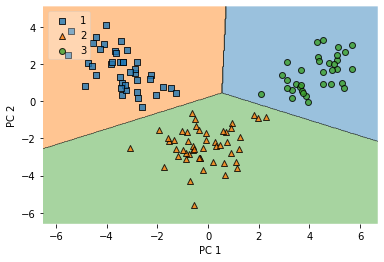

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_lda, np.array(y_train), clf = lr, legend = 2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


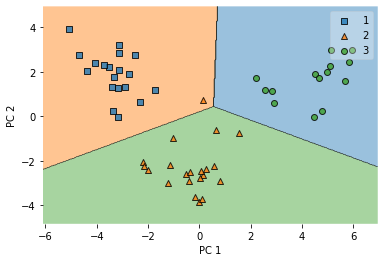

In [ ]:
plot_decision_regions(X_test_lda, np.array(y_test), clf = lr, legend = 1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

En lo personal me parece muy interesante la idea detrás de las reglas de asociación. Sobre todo en las posibles aplicaciones que tiene, más alla de lo comercial, pues pareciera que estamos hablando de detección de patrones en el comportamiento humano. Pienso en alguna posible aplicación como entender las reglas de asociación que pueden llevar a los crimiales a cometer algún delito, supongo algo similar a la detección de fraudes. Por otro lado y hablando del PCA pienso que es una implementación del álgebra lineal, como matemático es algo que llama particularmente mi atención, pues esta es sin duda una de las ramas de las matemáticas puras que tiene más aplicaciones. Y es que la creación de un subespacio vectorial que contenga la información del espacio de datos completos resulta bastante interesante.